In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_data():
    dataset = pd.read_csv('Salary_Data.csv')
    return dataset

In [3]:
def dataset_XY():
    dataset = load_data()
    X = dataset.iloc[:, :-1].values
    Y = dataset.iloc[:, 1].values
    return [X,Y]

In [4]:
from sklearn.cross_validation import train_test_split
def splitXYTrain(X, Y, testSize):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=testSize, random_state = 0)
    return [x_train, x_test, y_train, y_test]
    

/home/hduser/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
dataset = load_data()
X, Y = dataset_XY()
dataset.head()
print(dataset.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [6]:
x_train, x_test, y_train, y_test = splitXYTrain(X, Y, 0.2)

In [7]:
def xy_mean(x_train, y_train):
    x_mean = sum(x_train)/len(x_train)
    y_mean = sum(y_train)/len(y_train)
    return [x_mean, y_mean]

In [8]:
x_mean, y_mean = xy_mean(x_train, y_train)
print(x_mean)
print(y_mean)

[5.05833333]
73886.20833333333


In [9]:
numer = 0
denom = 0
m = len(x_train)
for i in range(m):
    numer += (x_train[i] - x_mean) * (y_train[i] - y_mean)
    denom += (x_train[i] - x_mean)**2
b1 = numer / denom
b0 = y_mean - (b1*x_mean)
print(b1, b0)

[9312.57512673] [26780.09915063]


In [10]:
#y_pred = []
#for i in range(len(x_test)):
#    y_pred1 = theta0 + (theta1 * x_test[i])
#    y_pred.append(y_pred1)
#print(y_pred)
y_pred = b0 + b1*x_train
print(y_pred)

[[116180.82036723]
 [ 64030.39965754]
 [ 76136.74732229]
 [100349.44265179]
 [ 53786.56701814]
 [ 74274.23229695]
 [ 56580.33955616]
 [ 68686.68722091]
 [103143.21518981]
 [ 90105.61001239]
 [ 38886.44681538]
 [124562.13798128]
 [ 54717.82453082]
 [ 47267.76442943]
 [ 81724.29239833]
 [ 82655.549911  ]
 [ 61236.62711953]
 [ 56580.33955616]
 [110593.27529119]
 [ 45405.24940409]
 [ 37023.93179003]
 [ 92899.38255041]
 [ 72411.7172716 ]
 [ 64030.39965754]]


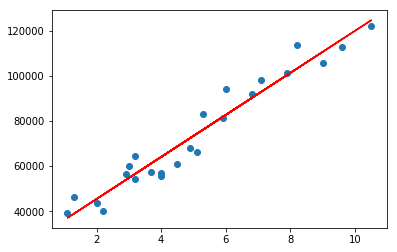

In [11]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='r')
plt.show()